# Práctica 2: Regresión logística
---
### Autores:
Raúl Murillo Montero - 5º Doble Grado en Ingeniería Informática - Matemáticas   
Miguel Sierra Esteso - 4º Grado en Ingeniería Informática

---
**Fecha de entrega:** 25 de octubre de 2018, 18.00h

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

## 1. Regresión logística

Los datos del fichero `ex2data1.csv` representan las notas obtenidas por una serie de candidatos
en los dos exámenes de admisión de una universidad junto con la información sobre si
fueron (1) o no (0) admitidos. El objetivo de la práctica es construir un modelo por regresión
logística que estime la probabilidad de que un estudiante sea admitido en esa universidad en base
a las notas de sus exámenes.

### 1.1. Visualización de los datos

In [2]:
def carga_csv(filename):
    data = read_csv(filename, header=None)
    return np.array(data.astype(float))

In [3]:
def plot_data(X,Y):
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o',c='y')
    plt.legend(['Admitted','Not admitted'])
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.show()

<IPython.core.display.Javascript object>


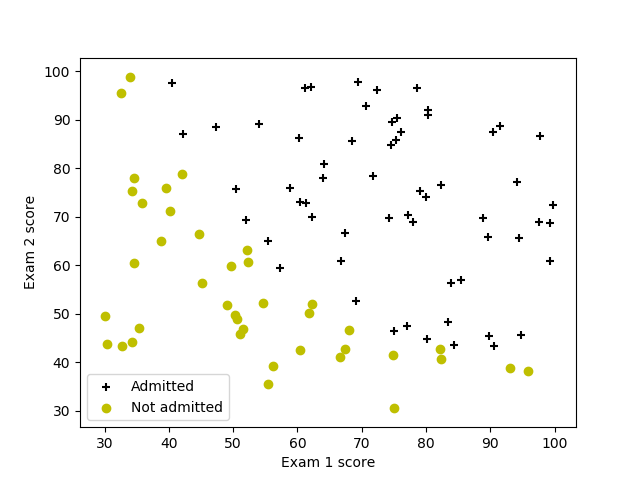

In [4]:
data = carga_csv("ex2data1.csv")
X = data[:,:-1]
Y = data[:,-1]
pos = np.where(Y == 1)
neg = np.where(Y == 0)

plot_data(X,Y)

### 1.2. Función sigmoide
$$g(z) = \frac{1}{1+e^{-z}}$$

In [5]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### 1.3. Cálculo de la función de coste y su gradiente
El valor de la función de coste en regresión logística viene dado por la expresión:
$$J(\theta) = \frac{1}{m}\sum_{i=1}^m \left[-y^{(i)}\log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))\right]$$
que en forma vectorizada se puede calcular como:
$$J(\theta) = \frac{1}{m}\left(-(\log(g(X\theta))^T y - (\log(1 -g(X\theta))^T (1-y)\right)$$

In [6]:
def coste(theta, x, y):
    return -(np.dot(np.transpose(np.log(sigmoid(np.dot(x, theta)))), y) + np.dot(np.transpose(np.log(1 - sigmoid(np.dot(x, theta)))), (1 - y)))/len(y)

El gradiente de la función de coste es un vector de la misma longitud que $\theta$ donde la componente
$j$ (para $j = 0, 1,\dots ,n$) viene dada por la expresión:
$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) x_j^{(i)}$$
que en forma vectorizada se puede calcular como:
$$\frac{\delta J(\theta)}{\delta \theta} = \frac{1}{m} X^T \left(g(X \theta) - y\right)$$

In [7]:
def gradiente(theta, x, y):
    return (np.dot(np.transpose(x), (sigmoid(np.dot(x, theta)) - y)))/len(y)

In [8]:
X_aux = np.hstack([np.ones((len(Y), 1)), X])
theta = [0,0,0]
print('El valor de la función de coste es de ', end='')
print(coste(theta, X_aux,Y))
print('El gradiente de la función de coste es ', end='')
print(gradiente(theta, X_aux,Y))

El valor de la función de coste es de 0.6931471805599452
El gradiente de la función de coste es [ -0.1        -12.00921659 -11.26284221]


### 1.4. Cálculo del valor óptimo de los parámetros

In [9]:
result = opt.fmin_tnc(func=coste, x0=theta, fprime=gradiente, args=(X_aux, Y))
theta_opt = result [0]
print('El coste óptimo es ', end="", flush=True)
print(coste(theta_opt, X_aux, Y))

El coste óptimo es 0.20349770158947497


In [10]:
def pinta_frontera_recta(X, Y, theta):
    #plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                            np.linspace(x2_min, x2_max))

    h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)),
                        xx1.ravel(),
                        xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)

    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
    #plt.savefig("frontera.pdf")
    plt.show()

<IPython.core.display.Javascript object>


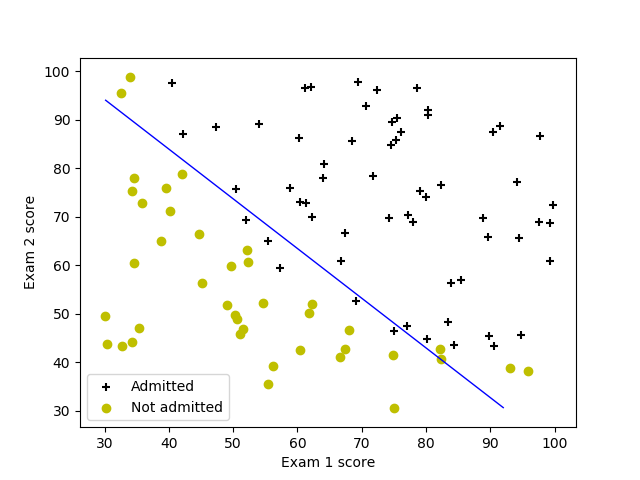

In [11]:
plot_data(X,Y)    
pinta_frontera_recta(X, Y, theta_opt)

### 1.5. Evaluación de la regresión logística

In [12]:
def accuracy(X, Y, theta):
    predictions = sigmoid(np.dot(X_aux,theta_opt))
    return sum((predictions>=0.5)==Y)/len(Y)*100

In [13]:
print('Se ha clasificado correctamente el ', end='')
print(accuracy(X_aux,Y, theta_opt), end='')
print('% de los ejemplos de entrenamiento')

Se ha clasificado correctamente el 89.0% de los ejemplos de entrenamiento


## 2. Regresión logística regularizada
En este apartado utilizarás la regresión logística regularizada para encontrar una función que
pueda predecir si un microchip pasará o no el control de calidad, a partir del resultado de dos
tests a los que se somete a los microchips.

In [14]:
def plot_data2(X,Y):
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], marker='+', c='k')
    plt.scatter(X[neg, 0], X[neg, 1], marker='o',c='y')
    plt.legend(['Pass','Fail'])
    plt.xlabel('Microchip test 1')
    plt.ylabel('Microchip test 2')
    plt.show()

<IPython.core.display.Javascript object>


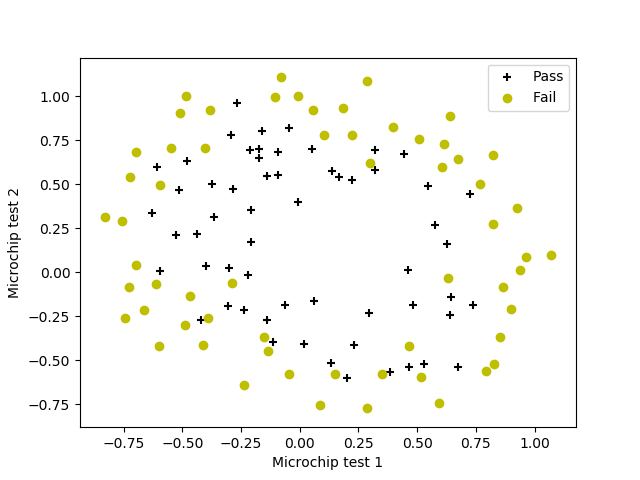

In [15]:
data2 = carga_csv("ex2data2.csv")
X = data2[:,:-1]
Y = data2[:,-1]
pos = np.where(Y == 1)
neg = np.where(Y == 0)

plot_data2(X,Y)

### 2.1. Mapeo de los atributos

In [47]:
poly = PolynomialFeatures(6)
mapFeature = poly.fit_transform(X)

### 2.2. Cálculo de la función de coste y su gradiente
La función de coste viene dada por la expresión:
$$J(\theta) = \left[\frac{1}{m}\sum_{i=1}^m \left[-y^{(i)}\log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))\right]\right] + \frac{\lambda}{2m} \sum_{j=1}^n\theta_j^2 $$
que en forma vectorizada puede calcularse como
$$J(\theta) = \frac{1}{m}\left(\left(-(\log(g(X\theta))^T y - (\log(1 -g(X\theta))^T (1-y)\right)\right) + \frac{\lambda}{2m} \sum_{j=1}^n\theta_j^2$$

In [113]:
def coste_log(theta, x, y, l):
    return (coste(theta, x, y) + l/(2*len(y))*(np.square(theta[1:])).sum())

El gradiente de la función de coste es un vector de la misma longitud que $\theta$ donde la componente
$j$ viene dada por la expresión:
\begin{aligned}
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^m \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) x_j^{(i)} && \text{para } j=0\\
\frac{\partial J(\theta)}{\partial \theta_j} = \left(\frac{1}{m}\sum_{i=1}^m \left(h_{\theta}(x^{(i)}) - y^{(i)}\right) x_j^{(i)}\right) + \frac{\lambda}{m}\theta_j && \text{para } j\geq 1
\end{aligned}
que en forma vectorizada puede calcularse como:
$$\frac{\delta J(\theta)}{\delta \theta} = \frac{1}{m} X^T \left(g(X \theta) - y\right) + \frac{\lambda}{m}\theta$$
teniendo cuidado de no incluir el término de regularización en el cálculo del gradiente respecto
de $\theta_0$.

In [115]:
def gradiente_log(theta, x, y, l):
    # para no incluir el término de regularización en el cálculo del gradiente respecto de theta_0
    aux = np.hstack(([0],theta[1:]))
    return (gradiente(theta, x, y) + l*aux/len(y))

In [116]:
theta = [0]*mapFeature[0]
l = 1
print('El valor de la función de coste es de ', end='')
print(coste_log(theta, mapFeature,Y, l))

El valor de la función de coste es de 0.6931471805599453


### 2.3. Cálculo del valor óptimo de los parámetros

In [117]:
theta = [0]*mapFeature[0]
result2 = opt.fmin_tnc(func=coste_log, x0=theta, fprime=gradiente_log, args=(mapFeature, Y, l))
theta_opt2 = result2[0]
print('El coste óptimo es ', end="", flush=True)
print(coste_log(theta_opt2, mapFeature, Y, l))

El coste óptimo es 0.5290027299645108


In [156]:
def plot_decisionboundary(X, Y, theta, poly):
    #plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                            np.linspace(x2_min, x2_max))
    
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(),
                                    xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)
    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    
    #plt.savefig("boundary.pdf")
    plt.show()

<IPython.core.display.Javascript object>


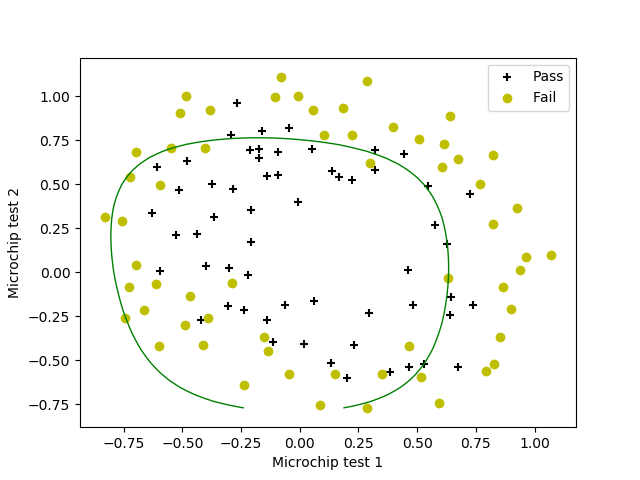

In [157]:
plot_data2(X,Y)    
plot_decisionboundary(X, Y, theta_opt2, poly)

### 2.4. Efectos de la regularización
Experimenta con distintos valores del parámetro $\lambda$ para ver cómo afecta el término de regularización
al aprendizaje logístico, comparando las gráficas resultantes y evaluando el resultado
del aprendizaje sobre los ejemplos de entrenamiento.

<IPython.core.display.Javascript object>


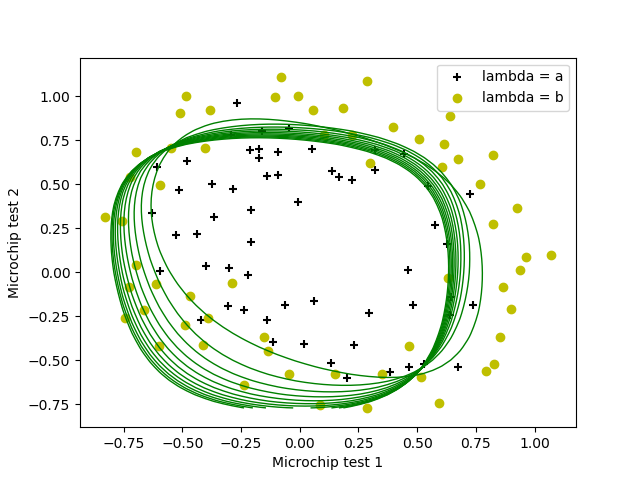

In [154]:
# Initial plot of points
plot_data2(X,Y)
lambdas = np.linspace(0.1, 20, 11)

for l in lambdas:
    
    theta = [0]*mapFeature[0]
    theta_opt2 = opt.fmin_tnc(func=coste_log, x0=theta, fprime=gradiente_log, args=(mapFeature, Y, l))[0]
    # plt.legend([l])
    plt.legend( ["lambda = a", "lambda = b", "lambda = c"])
    plot_decisionboundary(X, Y, theta_opt2, poly)